In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]])

#Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

557056/550378 [==============================] - 1s 2us/step


In [8]:
train_labels[10]

3

In [10]:
#Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#Vectorized training, test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#Vectorized training, test data
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
#Model definition

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
#Compiling the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
#Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [30]:
#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 457us/step - loss: 0.2604 - acc: 0.9399 - val_loss: 0.9215 - val_acc: 0.8080
Epoch 2/20
7982/7982 [==============================] - 3s 352us/step - loss: 0.1945 - acc: 0.9481 - val_loss: 0.9146 - val_acc: 0.8110
Epoch 3/20
7982/7982 [==============================] - 3s 364us/step - loss: 0.1712 - acc: 0.9526 - val_loss: 0.9642 - val_acc: 0.8150
Epoch 4/20
7982/7982 [==============================] - 3s 385us/step - loss: 0.1580 - acc: 0.9534 - val_loss: 0.9536 - val_acc: 0.8110
Epoch 5/20
7982/7982 [==============================] - 3s 389us/step - loss: 0.1456 - acc: 0.9538 - val_loss: 0.9506 - val_acc: 0.8170
Epoch 6/20
7982/7982 [==============================] - 3s 375us/step - loss: 0.1343 - acc: 0.9573 - val_loss: 0.9836 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 3s 362us/step - loss: 0.1253 - acc: 0.9584 - val_loss: 1.0254 - val_acc: 0.8000


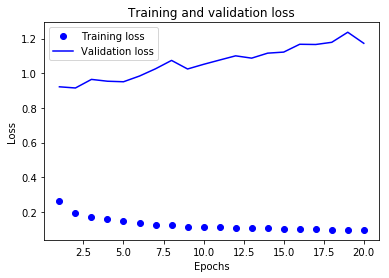

In [31]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

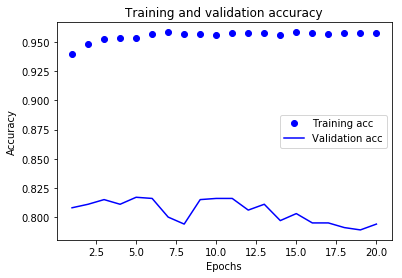

In [40]:
#Plotting the training and validation accuracy
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [60]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 4s 461us/step - loss: 2.7480 - acc: 0.5096
Epoch 2/9
8982/8982 [==============================] - 3s 343us/step - loss: 1.4245 - acc: 0.7100
Epoch 3/9
8982/8982 [==============================] - 3s 343us/step - loss: 1.0301 - acc: 0.7790
Epoch 4/9
8982/8982 [==============================] - 3s 333us/step - loss: 0.8020 - acc: 0.8312
Epoch 5/9
8982/8982 [==============================] - 3s 353us/step - loss: 0.6272 - acc: 0.8692
Epoch 6/9
8982/8982 [==============================] - 3s 335us/step - loss: 0.5028 - acc: 0.8947
Epoch 7/9
8982/8982 [==============================] - 3s 344us/step - loss: 0.4029 - acc: 0.9181
Epoch 8/9
8982/8982 [==============================] - 3s 332us/step - loss: 0.3325 - acc: 0.9294
Epoch 9/9
2246/2246 [==============================] - 1s 595us/step


In [61]:
results

[1.014028984207398, 0.7764915405164737]

In [52]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18788958147818344

In [62]:
#Generating predictions for new data

predictions = model.predict(x_test)

In [63]:
predictions[0].shape

(46,)

In [64]:
np.sum(predictions[0])

0.9999998

In [65]:
np.argmax(predictions[0])

4